# Comparison of Regressors for Real Estate Valuation

In this assignment we have been given the task to create a Decision Tree Regressor and a Linear Regression Model , and compare the performance of the two, from the given dataset. Our main objective is to figure out what is the best algorithm for this dataset.

## *The dataset*



#### *What is the purpose of this dataset?*
The purpose of this dataset is to predict the price of houses based on given features.

#### *What are the features?*
The features or our input data is:

- When the house was bought 
- How old the house is  
- How far from the nearest MRT station
- The amount of convenience stores
- Latitude
- Longitude
- House price of unit area


In essence, we are mostly dealing with continous values. 

#### *What are the targets?*
Our target will be the actual price that our model is trying to learn how to predict.


In [307]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Removed unnecessary coloumns

In [308]:
dataset = pd.read_csv('realestate.csv', sep=",")
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('No', axis=1, inplace=True)
dataset.head(5)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [309]:
#dataset.info()

## Splitting and Sampling

### Splitting

In this scenario, our split will be 60/20/20 split. We are looking for good generalization and stability in our model, when we are dealing with price. The 60/20/20 split is not universal answer for all datasets, but since the dataset we will be working with is small (414 rows * 7 columns), the split should be optimal.

### Sampling

Since we are dealing with regressors, we dont need to have a validation. We can do a two set split with training set and test set. However, we are going to include cross validation to help understanding how our model will perform, and observing the R2 score.

In [310]:
features = dataset.drop('Y house price of unit area', axis=1)
targets = dataset['Y house price of unit area']

train_features, test_features, train_targets, test_targets = train_test_split(features,targets,test_size=0.2)

train_features, validation_features, train_targets, validation_targets = train_test_split(train_features, train_targets, test_size=0.25)

### Creating our evaluate model

Here we do an evaluation on given metrics. We also include cross validation for these metrics.

In [311]:
def evaluate(model):
    
    predictions_train = model.predict(train_features)
    predictions_validation = model.predict(validation_features)
    predictions_test = model.predict(test_features)

    print(f"Train R2 score: {r2_score(train_targets, predictions_train)}")
    print(f"Train Mean Squared Error: {mean_squared_error(train_targets, predictions_train)}")
    print(f"Train Mean Absolute Error: {mean_absolute_error(train_targets, predictions_train)}")
    print()
    print(f"Validation R2 score: {r2_score(validation_targets, predictions_validation)}")
    print(f"Validation Squared Error: {mean_squared_error(validation_targets, predictions_validation)}")
    print(f"Validation Absolute Error: {mean_absolute_error(validation_targets, predictions_validation)}")

    print()
    print(f"Test R2 score: {r2_score(test_targets, predictions_test)}")
    print(f"Test Mean Squared Error: {mean_squared_error(test_targets, predictions_test)}")
    print(f"Test Mean Absolute Error: {mean_absolute_error(test_targets, predictions_test)}\n")

    cv_scores_r2 = cross_val_score(model, features, targets, cv=5, scoring='r2')
    print(f"Cross-validation R2 scores: {cv_scores_r2}")
    print(f"Mean cross-validation R2 score: {cv_scores_r2.mean():.4f} (+/- {cv_scores_r2.std() * 2:.4f})")

    print("")
    cv_scores_MSE = cross_val_score(model, features, targets, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-validation MSE scores: {-cv_scores_MSE}") # Note minus on this to get positive values, this is because you cant square negative numbers
    print(f"Mean cross-validation R2 score: {-cv_scores_MSE.mean():.4f} (+/- {cv_scores_MSE.std() * 2:.4f})") # Note minus on this to get positive values

    print("")
    cv_scores_MAE = cross_val_score(model, features, targets, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validation MSE scores: {-cv_scores_MAE}") # Note minus on this to get positive values
    print(f"Mean cross-validation R2 score: {-cv_scores_MAE.mean():.4f} (+/- {cv_scores_MAE.std() * 2:.4f})") # Note minus on this to get positive values

### Creating our Decision Tree Regressors


In [312]:
#Creating our DT regressor without any tuning
decision_tree_Regressor_model1 = DecisionTreeRegressor(random_state=42)
decision_tree_Regressor_model1.fit(train_features,train_targets)

DecisionTreeRegressor(random_state=42)

In [313]:
#Creating our DT regressor with tuning the max_depth

decision_tree_Regressor_model2 = DecisionTreeRegressor(max_depth=5,random_state=42)
decision_tree_Regressor_model2.fit(train_features,train_targets)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [314]:
#Creating our DT regressor with tuning the max_depth and the min_samples_split

decision_tree_Regressor_model3 = DecisionTreeRegressor(max_depth=5, min_samples_split=15,random_state=42)
decision_tree_Regressor_model3.fit(train_features,train_targets)


DecisionTreeRegressor(max_depth=5, min_samples_split=15, random_state=42)

In [322]:
print("DECISION TREE REGRESSOR without tuning:\n ")
evaluate(decision_tree_Regressor_model1)
print()
print("DECISION TREE REGRESSOR with tuning max_depth=5:\n ")
evaluate(decision_tree_Regressor_model2)
print()
print("DECISION TREE REGRESSOR with tuning max_depth=5 and min_samples_split=15:\n ")
evaluate(decision_tree_Regressor_model3)


DECISION TREE REGRESSOR without tuning:
 
Train R2 score: 0.9978952492226878
Train Mean Squared Error: 0.37391129032258064
Train Mean Absolute Error: 0.09274193548387097

Validation R2 score: 0.6097654645876871
Validation Squared Error: 68.89301204819279
Validation Absolute Error: 5.503614457831325

Test R2 score: 0.17356076839487267
Test Mean Squared Error: 167.92771084337346
Test Mean Absolute Error: 7.691566265060239

Cross-validation R2 scores: [0.57248712 0.54624024 0.5764161  0.49985731 0.23578495]
Mean cross-validation R2 score: 0.4862 (+/- 0.2563)

Cross-validation MSE scores: [ 74.00966867  84.05786145  72.48493976 120.30108434 112.82643293]
Mean cross-validation R2 score: 92.7360 (+/- 39.9955)

Cross-validation MSE scores: [5.59216867 6.47289157 5.69036145 6.52289157 5.91280488]
Mean cross-validation R2 score: 6.0382 (+/- 0.7795)

DECISION TREE REGRESSOR with tuning max_depth=5:
 
Train R2 score: 0.8468830012192023
Train Mean Squared Error: 27.20140322625789
Train Mean Absolu

### Finding the model to use for the comparison of the LR model.

1. The model without any tuning is too overfitted, based on the results of the training set. Also the scores on the test set are suboptimal.

2. The model with with max_depth seems to be less overfitted and generalizes good to the given data. Test scores are an improvement from having no tuning, however they are still not that great.

3. The model with both tunings seems to be the overall best when comparing the training and validation scores. The test scores are still bad, but improved. We will use this model to compare with the LR model.

## Lets observe the differences in plots

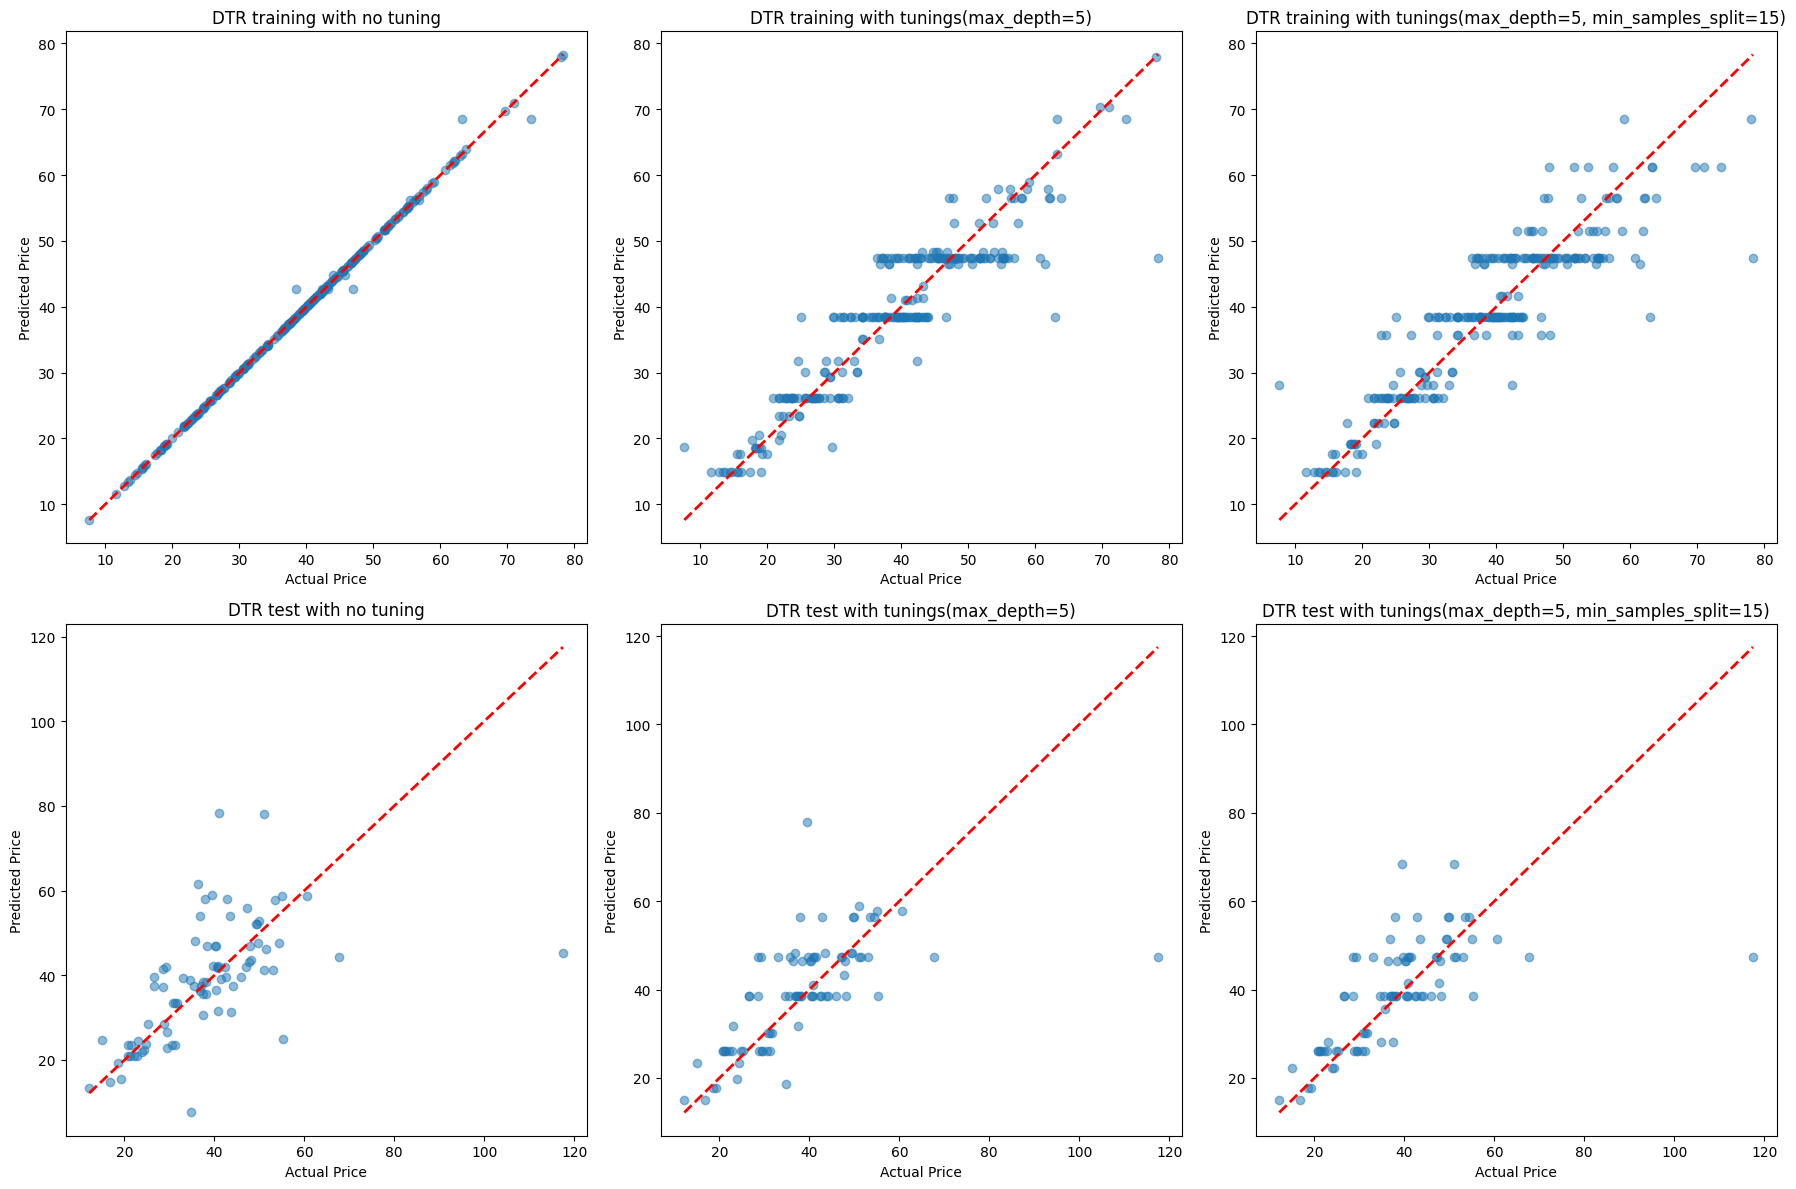

In [316]:
def plot_actual_vs_predicted(actual, predicted, set_name, ax):
    ax.scatter(actual, predicted, alpha=0.5)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(f"{set_name}")

train_predictions_1 = decision_tree_Regressor_model1.predict(train_features)
test_predictions_1 = decision_tree_Regressor_model1.predict(test_features)
train_predictions_2 = decision_tree_Regressor_model2.predict(train_features)
test_predictions_2 = decision_tree_Regressor_model2.predict(test_features)
train_predictions_3 = decision_tree_Regressor_model3.predict(train_features)
test_predictions_3 = decision_tree_Regressor_model3.predict(test_features)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_actual_vs_predicted(train_targets, train_predictions_1, "DTR training with no tuning", axs[0, 0])
plot_actual_vs_predicted(train_targets, train_predictions_2, "DTR training with tunings(max_depth=5)", axs[0, 1])
plot_actual_vs_predicted(train_targets, train_predictions_3, "DTR training with tunings(max_depth=5, min_samples_split=15)", axs[0, 2])
plot_actual_vs_predicted(test_targets, test_predictions_1, "DTR test with no tuning", axs[1, 0])
plot_actual_vs_predicted(test_targets, test_predictions_2, "DTR test with tunings(max_depth=5)", axs[1, 1])
plot_actual_vs_predicted(test_targets, test_predictions_3, "DTR test with tunings(max_depth=5, min_samples_split=15)", axs[1, 2])

plt.tight_layout()
plt.show()


### Observing the plots
#### The training set

1. (DTR no tuning) | We observe the model is highly overfitted, due to the almost perfect alignment with the stepped line.
2. (DTR max_depth) | We observe this model has generalized better with the data, and dont indicate too much overfitting compared to the no tuning model.
3. (DTR max_depth and min_samples_split) | We observe this model very similar to the model without min_samples_split. So there is no significant change. Therefore we will be basing the comparison of the model who scores best with the evaluation.
#### The test set

1. (DTR no tuning) | We observe the test set shows most likely a more accurate representation of how the model. The points are scattered unevenly around the stepped line.
2. (DTR max_depth) | We observe the test set shows better results based on the points being more clamped in "groups" in following the stepped line.
3. (DTR max_depth and min_samples_split) | We observe similar results to the previous model with tuning, that the points clamp more towards the center. However there is hard to tell a difference. Going forward we will compare the results from the evaluation.


### Creating our Linear Regressor

This model doesnt allow us to change any hyperparameters. So we will leave it as is.

In [317]:
linear_Regression_model1 = LinearRegression()
linear_Regression_model1.fit(train_features, train_targets)

LinearRegression()

In [318]:
print("LINEAR REGRESSION MODEL:\n")
evaluate(linear_Regression_model1)

LINEAR REGRESSION MODEL:

Train R2 score: 0.6249000073242874
Train Mean Squared Error: 66.63692622100969
Train Mean Absolute Error: 6.052585768517465

Validation R2 score: 0.6112994802087397
Validation Squared Error: 68.62219297127118
Validation Absolute Error: 6.492032184716676

Test R2 score: 0.4107269606079589
Test Mean Squared Error: 119.73690113262113
Test Mean Absolute Error: 6.336874919497205

Cross-validation R2 scores: [0.71179668 0.51938519 0.66182298 0.43950453 0.59327027]
Mean cross-validation R2 score: 0.5852 (+/- 0.1950)

Cross-validation MSE scores: [ 49.89284058  89.03269132  57.8698601  134.81795278  60.0483656 ]
Mean cross-validation R2 score: 78.3323 (+/- 62.3984)

Cross-validation MSE scores: [5.45307344 6.91618341 5.25745441 7.34836042 5.88922374]
Mean cross-validation R2 score: 6.1729 (+/- 1.6422)


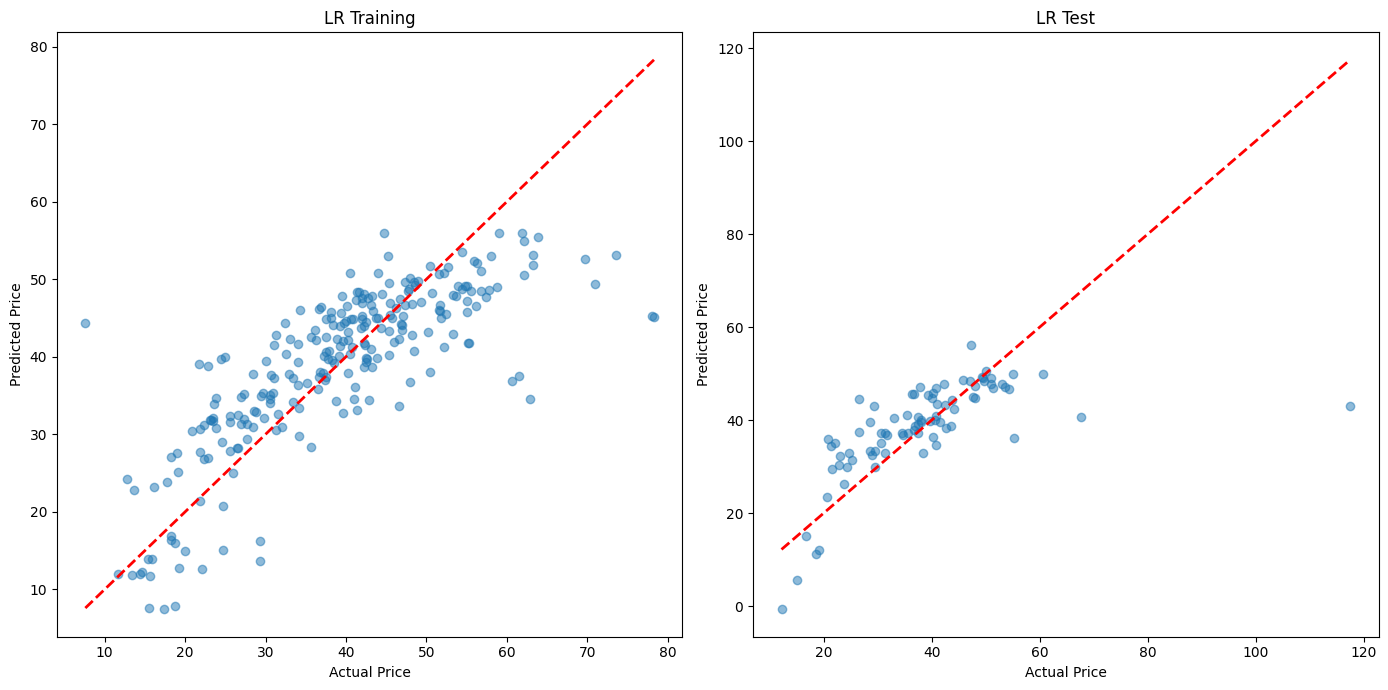

In [319]:
def plot_actual_vs_predicted2(actual, predicted, set_name, ax):
    ax.scatter(actual, predicted, alpha=0.5)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(f"{set_name}")

train_predictions = linear_Regression_model1.predict(train_features)
test_predictions = linear_Regression_model1.predict(test_features)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

plot_actual_vs_predicted2(train_targets, train_predictions, "LR Training", axs[0])
plot_actual_vs_predicted2(test_targets, test_predictions, "LR Test", axs[1])

plt.tight_layout()
plt.show()


### Observing the plot for the LR

#### The training set

We observe the points are very clamped in the middle of the line, with a slight ascension but stops halfway.

#### The test set

We observe the points are clamped in the middle of the line but more spread throughout the stepped line. Compared to the training set, the ascension is more steady and shows an improvement.


## Discussing the results

### The Decision Tree Regressor

#### Training data

The model shows strong performance on the training data, with an $R^2$ score of 0.8016, indicating that approximately 80% of the variance to the target is captured by the model. The remaining 20% tells us the variability is not explained by the model, likely due to noise or other factors thats not included in the dataset. The Mean Squared Error (MSE) is 35.25, and the Mean Absolute Error (MAE) is 4.31, suggesting that on average the model's predictions changes away from the actual values by about 4.31 "units". These metrics show the model fits the training data well.


#### Validation data

The validation results are also strong, however they show a slight drop compared to the training set. The $R^2$ is slightly lower than the training data. This might suggest slight overfitting. The MSE and MAE has both increased. This tells us that the model generalizes reasonably well to unseen data, however the increase in these error metrics points may suggest worse performance.

#### Test data

The test results shows the performance dropping significantly. The $R^2$ score drops to 0.3884. This big reduction suggests that the model struggles alot to generealize beyond the training and validation sets. The reason for this can potentially due to differences in the distribution.

### The Linear Regressor



#### Training data

The training data scores a $R^2$ of 0.6249. This performance is noticeably lower than the DTR. The MSE IS 66.63 and the MSA is 6.05. The model is decent at capturing the patterns, but still not the strongest performance.

#### Validation data

The validation data are close to the training results. This indiacate the performance is relatively the same.

#### Test data

The test data has also decreeased performance from the training and validation data. The $R^2$ score has dropped to 0.4107. This indicates that the test data has challanges generalizing to the unseen data. The MSE has almost doubled from the training and validation, while the MAE stays stable. Overall not impressive. But comparing to the DTR, it scores better.

## Conclusion

Taken into account that the LR model has no hyperparameter tuning, and comparing it to a model that has tunings that make it less complex, seems hard to compare. The performance of the LR is not as strong as the DTR. However, if we were to compare the DTR without any tuning, we see that the LR score is more reliable. Also the test scores the LR scores better.



### Possible improvements

- Added more models with different hyperparameters to make more comparisons.
- Explored with different splitting


## Acknowledgements

- The use of random_state=42 is to help the discussion and comparison. The models have been ran several times without any drastic changes in the model. The chosen random state is a stable seed. So I am aware that using random_seed is not really optimal. As stated in the other assignment,the model can be too finely tuned to the random initialisation and may not generalize well to new or unseen data in other conditions.
- Using the max_depth tuning, we make our model more simple, and less complex.
- Having the chosen split. Based of the size of the dataset, might not give enough data to the smaller splits for them to train properly or give good results.